In [1]:
import numpy as np
#0,2,6,7,9,14,15,16,17,18
list = []
list1 = []
with open('C:\RUTGERS\Analytics\BDdata_S1_prateek5.csv') as f:
    for line in f:
        ele = line.split(',')
        #LTDuration Normalized
        #list.append(np.delete(line.split(','), [0,1,2,5,9,13]).tolist())
        #Normal
        list.append(np.delete(line.split(','), [0,1,2,5,10,13]).tolist())

print (list[0])
print (list[1])
print (list[2])
print (list[25645])

['GENDER', 'AGE', 'MONTHJOINED', 'SOURCE', 'DEVICE', 'LTDURATION', 'Day0CLV', ' LTCLV ']
['F', '71.11666667', 'January', 'HumanInteraction', 'NULL', '274', '37.19', '181.1']
['F', '44.28333333', 'July', 'facebook', 'anphone', '107', '37.31', '37.31']
['F', '57.875', 'April', 'facebook', 'anphone', '178', '37.19', '123.17']


In [2]:
del list[0]

In [3]:
ltclv = []
for ele in list:
    ltclv.append(float(ele[7]))
    """
    if ele[7] == ele[6]:
        pass
    else:
        ltclv.append(float(ele[7]))
    """
    
print (np.min(ltclv))
print (np.mean(ltclv))
print (np.std(ltclv))

36.96
81.8305469467
94.962060581


In [4]:
class_train = []

#include single users


for ele in list:
    if float(ele[7]) == float(ele[6]):
        class_train.append(0)
    elif float(ele[7]) < 81.83:
        class_train.append(1)
    elif float(ele[7]) < 176.79:
        class_train.append(2)
    else:
        class_train.append(3)
"""

#not include single users
for ele in list:
    if float(ele[7]) == float(ele[6]):
        class_train.append(0)
    elif float(ele[7]) < 153.67:
        class_train.append(1)
    elif float(ele[7]) < 276.84:
        class_train.append(2)
    else:
        class_train.append(3)
"""

min2 = 10000.0
max2 = 0.0

for ele1,ele2 in zip(list,class_train):
    if ele2 == 2:
        if float(ele1[7]) < float(min2):
            min2 = ele1[7]
        if float(ele1[7]) > float(max2):
            max2 = ele1[7]

print (max2)
print (min2)

from collections import Counter
c = Counter(class_train)
print (c.most_common())
import sys
sys.exit

176.73
81.91
[(0, 25556), (2, 5784), (1, 5316), (3, 4774)]


<function sys.exit>

In [5]:
gender = ['F','M','NULL']
MonthJoined = ['January','February','March','April','May','June','July','August','September','October', 'NULL']
source = ['facebook', 'NULL', 'HumanInteraction', 'bing', 'adwords', 'pinterest', 'retargeting', 'affiliate', 'google', 'youtube', 'thrivefacebook']
device = ['iphone', 'NULL', 'anphone', 'desktop']

final = []

for ele in list:
    gen = ele[0]
    mon = ele[2]
    sou = ele[3]
    dev = ele[4]
    if ele[1] == 'NULL':
        age = 7
    elif float(ele[1]) <= 17:
        age = 0
    elif float(ele[1]) <= 24:
        age = 1
    elif float(ele[1]) <= 34:
        age = 2
    elif float(ele[1]) <= 44:
        age = 3
    elif float(ele[1]) <= 54:
        age = 4
    elif float(ele[1]) <= 64:
        age = 5
    else:
        age = 6
    if ele[1] == 'NULL':
        ele[1] = 0
    if ele[5] == 'NULL':
        ele[5] = 0
    if ele[6] == 'NULL':
        ele[6] = 0
    #Normal    
    final.append([gender.index(gen), float(ele[1]), MonthJoined.index(mon), source.index(sou), device.index(dev), float(ele[5]), float(ele[6])])
    #Remove Age & LTDuration
    #final.append([gender.index(gen),MonthJoined.index(mon), source.index(sou), device.index(dev), float(ele[6])])
    #Nominal Age
    #final.append([gender.index(gen), age, MonthJoined.index(mon), source.index(sou), device.index(dev), float(ele[5]), float(ele[6])])

print (list[0])
print (list[1])
print (final[0])
print (final[1])

['F', '71.11666667', 'January', 'HumanInteraction', 'NULL', '274', '37.19', '181.1']
['F', '44.28333333', 'July', 'facebook', 'anphone', '107', '37.31', '37.31']
[0, 71.11666667, 0, 2, 1, 274.0, 37.19]
[0, 44.28333333, 6, 0, 2, 107.0, 37.31]


In [6]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(final, class_train, test_size=0.2)

c = Counter(y_train)
print (c.most_common())

c = Counter(y_test)
print (c.most_common())


print (len(y_train))
print (len(y_test))

[(0, 20375), (2, 4639), (1, 4262), (3, 3868)]
[(0, 5181), (2, 1145), (1, 1054), (3, 906)]
33144
8286


In [7]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 0.625271542361
             precision    recall  f1-score   support

       Once       0.63      1.00      0.77      5181
        Low       0.00      0.00      0.00      1054
        Mid       0.00      0.00      0.00      1145
       High       0.00      0.00      0.00       906

avg / total       0.39      0.63      0.48      8286

Confusion matrix, without normalization
[[5181    0    0    0]
 [1054    0    0    0]
 [1145    0    0    0]
 [ 906    0    0    0]]


C:\Users\prate\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.6145959   0.6145959   0.6147813   0.6147813   0.6147813   0.61466506
  0.61466506  0.61466506  0.61485059  0.61503623]


C:\Users\prate\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\prate\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\prate\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\prate\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\prate\Anaconda3\lib\site-packages\sklearn\m

[ 0.37784206  0.37772812  0.37795604  0.37795604  0.37795604  0.37781313
  0.37792717  0.37781313  0.37804125  0.37826957]
[ 0.6145959   0.6145959   0.6147813   0.6147813   0.6147813   0.61466506
  0.61466506  0.61466506  0.61485059  0.61503623]


C:\Users\prate\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\prate\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\prate\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\prate\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\prate\Anaconda3\lib\site-packages\sklearn\metrics\c

[ 0.46797924  0.46789183  0.46812041  0.46812041  0.46812041  0.4679771
  0.46806457  0.4679771   0.46820585  0.46843477]


C:\Users\prate\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


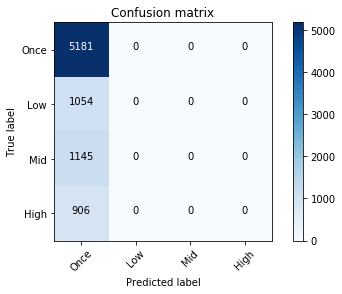

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import BernoulliNB


class_names = ['Once','Low','Mid','High']
#print len(X_train)
#print len(y_train)

clf = BernoulliNB()
clf.fit(X_train, y_train)

pred = clf.predict(np.array(X_test))
proba = clf.predict_proba(np.array(X_test))

score = []
for ele in proba:
    score.append(ele[1])

from sklearn.metrics import accuracy_score
print ('Accuracy: '+str(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred, target_names=class_names))


cnf_matrix = confusion_matrix(y_test, pred)


%matplotlib inline
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.figure()

#For Cross Validatio
#scores = cross_validate(clf, final, class_train, cv=10, scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted'])
#print (scores)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = 'accuracy')
print (scores)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = 'precision_weighted')
print (scores)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = 'recall_weighted')
print (scores)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = 'f1_weighted')
print (scores)

[ 0.02822236  0.50322018  0.01681107  0.03861216  0.06574276  0.33703412
  0.01035734]
Accuracy: 0.542843350229
             precision    recall  f1-score   support

       Once       0.64      0.81      0.71      5181
        Low       0.19      0.11      0.14      1054
        Mid       0.20      0.11      0.14      1145
       High       0.16      0.09      0.11       906

avg / total       0.47      0.54      0.50      8286

Confusion matrix, without normalization
[[4173  348  358  302]
 [ 787  118   86   63]
 [ 864   89  128   64]
 [ 674   79   74   79]]
[ 0.52382388  0.53679131  0.51402715  0.53333333  0.52911011  0.52112251
  0.52896801  0.53349427  0.53154241  0.52596618]
[ 0.45467494  0.45485457  0.44263502  0.45456198  0.45494337  0.45022414
  0.45245765  0.45656218  0.46476424  0.46114465]
[ 0.52382388  0.5331725   0.51855204  0.53122172  0.53574661  0.53862402
  0.52806276  0.53198552  0.52218533  0.52868357]
[ 0.47948231  0.48598731  0.46712859  0.47808165  0.48134389  0.4

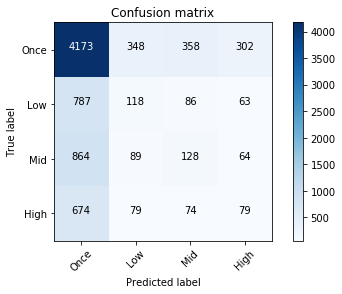

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features = None)

clf2.fit(X_train, y_train)

pred2 = clf2.predict(np.array(X_test))
proba2 = clf2.predict_proba(np.array(X_test))

score2 = []
for ele in proba2:
    score2.append(ele[1])
    
print (clf2.feature_importances_)

print ('Accuracy: '+str(accuracy_score(y_test, pred2)))
print(classification_report(y_test, pred2, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, pred2)

%matplotlib inline
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.figure()

#For Cross Validation
#scores = cross_validate(clf2, final, class_train, cv=10, scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted'])
#print (scores)
scores = cross_val_score(clf2, X_train, y_train, cv=10, scoring = 'accuracy')
print (scores)
scores = cross_val_score(clf2, X_train, y_train, cv=10, scoring = 'precision_weighted')
print (scores)
scores = cross_val_score(clf2, X_train, y_train, cv=10, scoring = 'recall_weighted')
print (scores)
scores = cross_val_score(clf2, X_train, y_train, cv=10, scoring = 'f1_weighted')
print (scores)

In [ ]:
from sklearn.svm import SVC

clf3 = SVC(probability=False)

clf3.fit(X_train, y_train)

pred3 = clf3.predict(np.array(X_test))
#proba3 = clf3.predict_proba(np.array(X_test))

"""
score3 = []
for ele in proba3:
    score3.append(ele[1])
"""

print ('Accuracy: '+str(accuracy_score(y_test, pred3)))
print(classification_report(y_test, pred3, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, pred3)

%matplotlib inline
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.figure()
"""
fpr, tpr, thresholds = roc_curve(y_test, score)
plt.plot(fpr,tpr,color='b', alpha=0.2, label= 'Naive')

fpr2, tpr2, thresholds2 = roc_curve(y_test, score2)
plt.plot(fpr2,tpr2,color='r', alpha=0.2, label= 'RF')

fpr3, tpr3, thresholds3 = roc_curve(y_test, score3)
plt.plot(fpr3,tpr3,color='g', alpha=0.2, label= 'SVC')

plt.figure
"""
#For Cross Validatio
#scores = cross_validate(clf3, final, class_train, cv=10, scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted'])
#print (scores)
scores = cross_val_score(clf3, X_train, y_train, cv=10, scoring = 'accuracy')
print (scores)
scores = cross_val_score(clf3, X_train, y_train, cv=10, scoring = 'precision_weighted')
print (scores)
scores = cross_val_score(clf3, X_train, y_train, cv=10, scoring = 'recall_weighted')
print (scores)
scores = cross_val_score(clf3, X_train, y_train, cv=10, scoring = 'f1_weighted')
print (scores)